In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
df = pd.read_csv('Exam Scores.csv')
df.head()

,Hours Studied,Exam Score
0,4,62
1,7,73
2,12,83
3,11,79
4,6,71


In [3]:
# EDA - Univariate Analysis
# Use the describe() method to generate summary statistics of the data
df.describe()

,Hours Studied,Exam Score
count,308.000000,308.000000
mean,7.691558,72.831169
std,3.722324,12.639736
min,2.000000,47.000000
25%,5.000000,64.000000
50%,8.000000,74.000000
75%,10.250000,82.250000
max,15.000000,95.000000


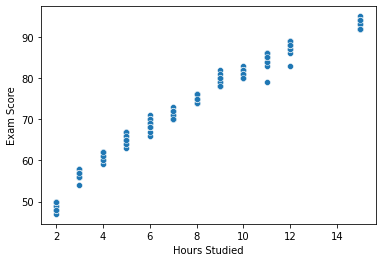

In [4]:
# EDA - Bivariate Analysis
# Use the scatterplot function from seaborn to visualize the relationship between 'Hours Studied' and 'Exam Score'
sns.scatterplot(data=df, x='Hours Studied', y='Exam Score')
plt.show()

In [5]:
# Prepare data for Machine Learning
# Extract the 'Hours Studied' and 'Exam Score' columns from the dataframe and convert them to numpy arrays
X = df['Hours Studied'].values.reshape(-1,1)
y = df['Exam Score'].values.reshape(-1,1)

In [6]:
# Split data into training and testing sets
# Use the train_test_split function from scikit-learn to randomly split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

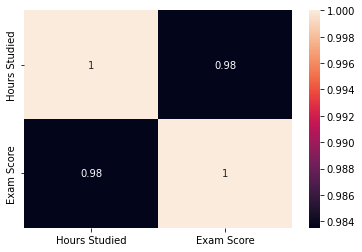

In [7]:
# Feature Engineering
# Check for correlation using heatmap
# Use the heatmap function from seaborn to visualize the correlation between the columns in the dataframe
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
# Model Building - Simple Linear Regression
# Create a LinearRegression object from scikit-learn
model = LinearRegression()

In [9]:
# Model Training
# Use the fit() method of the LinearRegression object to train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Model Evaluation
# Use the predict() method of the LinearRegression object to make predictions on the test data
y_pred = model.predict(X_test)
# Limit predicted scores to a maximum of 100
y_pred = np.clip(y_pred, None, 100)
# Use the mean_squared_error() and r2_score() functions from scikit-learn to evaluate the model's performance
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:',r2_score(y_test, y_pred))

Mean Squared Error: 5.329920906079364
R-squared: 0.9641965256544549


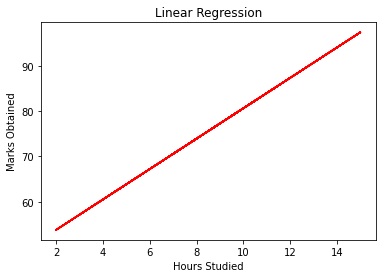

In [11]:
# Plot the regression line
# Use the plot() function from matplotlib to plot the regression line on the scatterplot
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')
plt.show()

In [12]:
# Get user input for hours studied
hours_studied = int(input('Enter number of hours you studied:\t'))
# Model Prediction on Test Data
# Use the predict() method of the LinearRegression object to make a prediction for the user input
hours_studied = np.array([hours_studied]).reshape(-1,1)
predicted_score = model.predict(hours_studied)
# Limit predicted scores to a maximum of 100
predicted_score = np.clip(predicted_score, None, 100)
print('Predicted Exam Score:', predicted_score[0][0])

Enter number of hours you studied:	5
Predicted Exam Score: 63.835939233377275
